In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

%matplotlib notebook
import numpy as np
import scipy.stats as stats
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [2]:
# параметры распределений
covariate0 = 0.0
mu0, sigma0 = [-2., -2], [[1., covariate0], [covariate0, 2.]]
covariate1 = 0.0
mu1, sigma1 = [3., 3.], [[2., covariate1], [covariate1, 3.]]
size_shape = 2

In [3]:
def sample(d0, d1, n=32):
    x0 = d0.sample((n,))
    x1 = d1.sample((n,))
    y0 = torch.zeros((n, 1))
    y1 = torch.ones((n, 1))
    return torch.cat([x0, x1], 0), torch.cat([y0, y1])

In [4]:
d0 = torch.distributions.MultivariateNormal(torch.tensor(mu0), torch.tensor(sigma0))
d1 = torch.distributions.MultivariateNormal(torch.tensor(mu1), torch.tensor(sigma1))

In [5]:
layer = nn.Linear(size_shape, 1)
print([p.data[0] for p in layer.parameters()])
layer_opt = optim.SGD(lr=1e-3, params=list(layer.parameters()))

[tensor([ 0.6884, -0.5546]), tensor(-0.1285)]


In [6]:
log_freq = 500
for i in range(10000):
    if i%log_freq == 0:
        with torch.no_grad():
            x, y = sample(d0, d1, 100000)
            out = torch.sigmoid(layer(x))
            loss = F.binary_cross_entropy(out, y)
        print('Ошибка после %d итераций: %f' %(i/log_freq, loss))
    layer_opt.zero_grad()
    x, y = sample(d0, d1, 1024)
    out = torch.sigmoid(layer(x))
    loss = F.binary_cross_entropy(out, y)
    loss.backward()
    layer_opt.step()

Ошибка после 0 итераций: 0.696410
Ошибка после 1 итераций: 0.215739
Ошибка после 2 итераций: 0.130237
Ошибка после 3 итераций: 0.099100
Ошибка после 4 итераций: 0.081386
Ошибка после 5 итераций: 0.070037
Ошибка после 6 итераций: 0.063272
Ошибка после 7 итераций: 0.057133
Ошибка после 8 итераций: 0.053149
Ошибка после 9 итераций: 0.049050
Ошибка после 10 итераций: 0.046738
Ошибка после 11 итераций: 0.044355
Ошибка после 12 итераций: 0.042107
Ошибка после 13 итераций: 0.040459
Ошибка после 14 итераций: 0.038672
Ошибка после 15 итераций: 0.037349
Ошибка после 16 итераций: 0.036256
Ошибка после 17 итераций: 0.035503
Ошибка после 18 итераций: 0.034656
Ошибка после 19 итераций: 0.033448


In [37]:
number_points = 90
x_scale = np.linspace(-10, 10, number_points)
y_scale = np.linspace(-10, 10, number_points)
X,Y = np.meshgrid(x_scale, y_scale)
pos = np.dstack((X, Y))#.reshape(-1, 2)
d0_pdf = stats.multivariate_normal.pdf(pos, mu0, sigma0) 
d1_pdf = stats.multivariate_normal.pdf(pos, mu1, sigma1)
xy_tensor = torch.tensor(pos, dtype=torch.float)
with torch.no_grad():
    dist = torch.sigmoid(layer(xy_tensor)).numpy()
ratio = d1_pdf / (d1_pdf + d0_pdf)

<IPython.core.display.Javascript object>


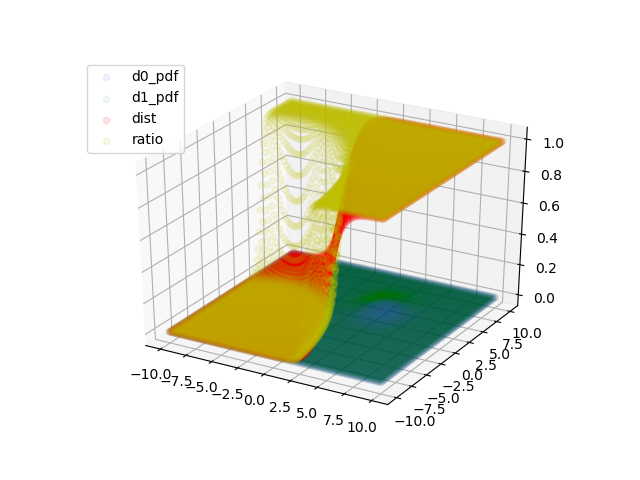

In [39]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X, Y, d0_pdf, c = 'b', label='d0_pdf', alpha=0.05)
ax.scatter3D(X, Y, d1_pdf, c = 'g', label='d1_pdf', alpha=0.05)
ax.scatter3D(X, Y, dist, c = 'r', label='dist', alpha=0.1)
ax.scatter3D(X, Y, ratio, c = 'y', label='ratio', alpha=0.1)
ax.legend()
ax.grid(True)
plt.show()

In [11]:
torch.log(F.sigmoid(torch.tensor(-100.)))

/opt/conda/lib/python3.6/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor(-inf)

In [12]:
F.logsigmoid(torch.tensor(-100.))

tensor(-100.)